In [1]:
import pandas as pd

df=pd.read_csv("./Test_mpa/VO_annonces_2015-ALL_CR.csv")

/home/wilder/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [2]:
df['stk_year']

(3552912, 16)

On compte 3 552 912 lignes

In [12]:
df.isnull().sum(axis = 0)

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               1708156
transmission            741630
door_count              614373
seat_count              749489
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64

Regardons le nombre de valeurs manquantes pour chaque colonne

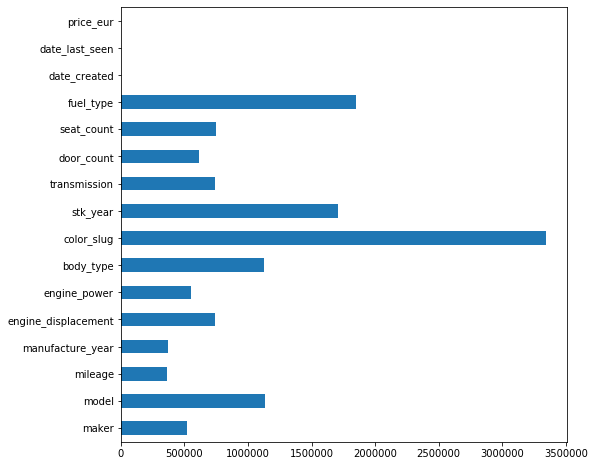

In [17]:
df.isnull().sum(axis = 0).plot(kind='barh',figsize=(8,8))

In [22]:
# Question 1 : réponse 4227
# On considère qu'une annonce a été scannée correctement si toutes les colonnes ont des valeurs non nulles

df.dropna().count()


maker                  4227
model                  4227
mileage                4227
manufacture_year       4227
engine_displacement    4227
engine_power           4227
body_type              4227
color_slug             4227
stk_year               4227
transmission           4227
door_count             4227
seat_count             4227
fuel_type              4227
date_created           4227
date_last_seen         4227
price_eur              4227
dtype: int64

In [31]:
# Question 2 : réponse 2 739 745
# Une voiture a été vendue en 2016 si l'année dans date_last_seen est 2016
from datetime import datetime

df['date_last_seen'] =  pd.to_datetime(df['date_last_seen'], format='%Y-%m-%d %H:%M:%S.%f')
df['date_created'] =  pd.to_datetime(df['date_created'], format='%Y-%m-%d %H:%M:%S.%f')
df_2016=df[df['date_last_seen'].apply(lambda t: t.year==2016)]
df_2016.shape

(2739745, 16)

In [21]:
import numpy as np

np.sum(df['date_last_seen'].apply(lambda t: t.year==2016))

2739745

In [26]:
# Question 3 : taille du marché pour 2016 environ 5 767 millards

taille_marche_2016=df_2016['price_eur'].sum()
taille_marche_2016

5766979259558.21

In [27]:
# Question 4

df.groupby('maker')['price_eur'].sum()

maker
alfa-romeo       9.465196e+06
aston-martin     1.542562e+05
audi             7.668954e+09
bentley          1.118066e+08
bmw              2.684518e+12
chevrolet        1.642633e+08
chrysler         7.472233e+07
citroen          4.586659e+10
dacia            2.621768e+06
dodge            1.187667e+08
fiat             1.962673e+09
ford             3.051006e+09
honda            5.488982e+08
hummer           3.223976e+07
hyundai          9.022811e+08
infinity         1.341048e+07
isuzu            2.916296e+07
jaguar           2.844401e+08
jeep             3.613753e+08
kia              5.332880e+08
lamborghini      1.130915e+08
lancia           1.273245e+08
land-rover       2.229280e+06
lexus            1.037322e+08
lotus            1.620945e+07
maserati         1.069061e+08
mazda            5.821656e+08
mercedes-benz    6.159396e+09
mini             5.303919e+08
mitsubishi       8.175948e+08
nissan           8.695164e+08
opel             2.137257e+09
peugeot          6.226713e+08
pors

In [28]:
# Question 5 (part de marché de chacune des marques)
taille_marche_total=df['price_eur'].sum()
df.groupby('maker')['price_eur'].sum()/taille_marche_total*100

maker
alfa-romeo        0.000164
aston-martin      0.000003
audi              0.132764
bentley           0.001936
bmw              46.474159
chevrolet         0.002844
chrysler          0.001294
citroen           0.794039
dacia             0.000045
dodge             0.002056
fiat              0.033978
ford              0.052819
honda             0.009502
hummer            0.000558
hyundai           0.015620
infinity          0.000232
isuzu             0.000505
jaguar            0.004924
jeep              0.006256
kia               0.009232
lamborghini       0.001958
lancia            0.002204
land-rover        0.000039
lexus             0.001796
lotus             0.000281
maserati          0.001851
mazda             0.010078
mercedes-benz     0.106631
mini              0.009182
mitsubishi        0.014154
nissan            0.015053
opel              0.037000
peugeot           0.010780
porsche           0.028693
renault          46.861474
rolls-royce       0.000016
rover             0.01

In [32]:
df_2016['timedelta']=df_2016['date_last_seen']-df_2016['date_created']

/home/wilder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
import numpy as np

np.mean(df_2016['timedelta'])

Timedelta('89 days 22:38:30.456993')

Les annonces sont restées en moyenne 90 jours 

In [ ]:
# Age moyen d'une VO en 2016

In [45]:
np.mean((df_2016['date_last_seen'].apply(lambda x: x.year)-df_2016['manufacture_year']).dropna())

13.339718755423979

Un peu plus de 13 ans !!!!!

In [ ]:
# Annonces oubliées

On regarde la distribution du temps en jours des annonces en ligne

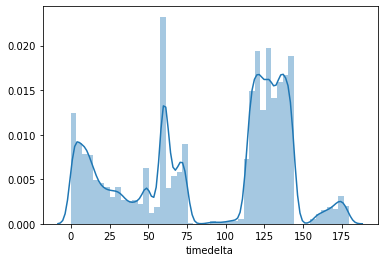

In [46]:
sns.distplot(df_2016['timedelta'].apply(lambda x:x.days))

On n'observe pas de concentration particulière de la distribution en un endroit, difficile de savoir quelles annonces ont été oubliées. Cependant, il semble y avoir un pic vers 60.

In [49]:
df_2016['timedelta'].apply(lambda x:x.days).value_counts()[:10]

60     167892
143     73708
142     67330
116     62981
128     62387
135     61048
115     58827
120     57251
117     56116
129     53808
Name: timedelta, dtype: int64

On voit bien un grand nombre d'annonces qui disparaissent au bout de 60 jours, on va considérer que ce sont des annonces oubliées d'une plateforme qui les suppriment automatiquement. On va donc considérer que 167 892 annonces ont été oubliées.

In [50]:
np.mean(df_2016['timedelta'].apply(lambda x:x.days))

89.4625959715229

Une VO s'est vendue en moyenne au bout de 90 jours en 2016

In [54]:
timedelta_days_2016=df_2016['timedelta'].apply(lambda x:x.days)


In [58]:
np.mean(timedelta_days_2016[timedelta_days_2016!=60])

91.38593068888463

En supprimant les annonces considérées comme oubliées, on obtient presque le même résultat

In [68]:
df_2016['timedelta_day']=df_2016['timedelta'].apply(lambda x:x.days)
df_2016.groupby('model')['timedelta_day'].mean().sort_values()

/home/wilder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


model
s350-cdi      0.000000
418i          0.000000
siena         0.000000
33            0.000000
545i          0.333333
               ...    
qx50        135.944444
q60         138.000000
malaga      139.000000
freestar    140.125000
rogue       143.000000
Name: timedelta_day, Length: 889, dtype: float64

Les 5 modèles qui se sont vendus le plus rapidement sont en haut